# Import de modules généraux

In [7]:
from __future__ import division

import pandas
import seaborn


# Import de modules spécifiques à Openfisca

In [8]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_bar
from openfisca_france_indirect_taxation.surveys import SurveyScenario


# Import d'une nouvelle palette de couleurs

In [9]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Sélection des variables pour la simulation

In [10]:
simulated_variables = [
    'tva_total',
    'ticpe_totale',
    'vin_droit_d_accise',
    'biere_droit_d_accise',
    'alcools_forts_droit_d_accise',
    'cigarette_droit_d_accise',
    'cigares_droit_d_accise',
    'tabac_a_rouler_droit_d_accise',
    'assurance_transport_taxe',
    'assurance_sante_taxe',
    'autres_assurances_taxe',
    'rev_disponible',
    ]


# Calcul des contributions des ménages aux différentes taxes indirectes, par décile de revenu

Contributions aux taxes indirectes en part du revenu disponible,
        par décile de revenu en 2000


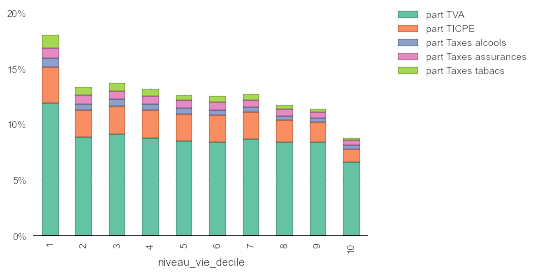

Contributions aux taxes indirectes en part du revenu disponible,
        par décile de revenu en 2005


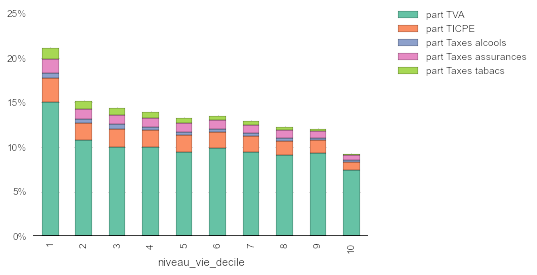

Contributions aux taxes indirectes en part du revenu disponible,
        par décile de revenu en 2011


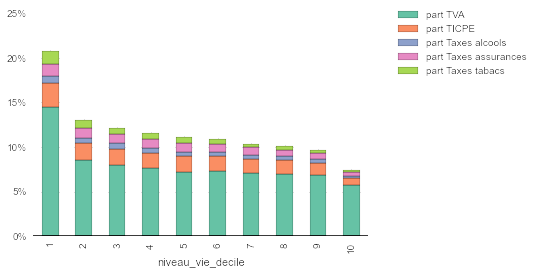

In [11]:
    for year in [2000, 2005, 2011]:
        survey_scenario = SurveyScenario.create(year = year)
        pivot_table = pandas.DataFrame()
        for values in simulated_variables:
            pivot_table = pandas.concat([
                pivot_table,
                survey_scenario.compute_pivot_table(values = [values], columns = ['niveau_vie_decile'])
                ])
        taxe_indirectes = pivot_table.T

        taxe_indirectes['TVA'] = taxe_indirectes['tva_total']
        taxe_indirectes['TICPE'] = taxe_indirectes['ticpe_totale']
        taxe_indirectes[u'Taxes alcools'] = (
            taxe_indirectes['vin_droit_d_accise'] +
            taxe_indirectes['biere_droit_d_accise'] +
            taxe_indirectes['alcools_forts_droit_d_accise']
            ).copy()
        taxe_indirectes[u'Taxes assurances'] = (
            taxe_indirectes['assurance_sante_taxe'] +
            taxe_indirectes['assurance_transport_taxe'] +
            taxe_indirectes['autres_assurances_taxe']
            ).copy()
        taxe_indirectes[u'Taxes tabacs'] = (
            taxe_indirectes['cigarette_droit_d_accise'] +
            taxe_indirectes['cigares_droit_d_accise'] +
            taxe_indirectes['tabac_a_rouler_droit_d_accise']
            ).copy()

        list_part_taxes = []
        for taxe in ['TVA', 'TICPE', u'Taxes alcools', u'Taxes assurances', u'Taxes tabacs']:
            taxe_indirectes[u'part ' + taxe] = (
                taxe_indirectes[taxe] / taxe_indirectes['rev_disponible']
                )
            'list_part_taxes_{}'.format(taxe)
            list_part_taxes.append(u'part ' + taxe)

        df_to_graph = taxe_indirectes[list_part_taxes]

        print '''Contributions aux taxes indirectes en part du revenu disponible,
            par décile de revenu en {}'''.format(year)
        graph_builder_bar(df_to_graph)
